In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

## Загрузим датасет

In [64]:
dataset = pd.read_csv(r"../input/customer-analytics/Train.csv")

In [65]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [66]:
dataset.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Уберем столбец с ID, он нам не нужен

In [67]:
dataset.drop(columns=['ID'], inplace=True)

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


## Посмотрим доставки, которые выполнены без задержек

## Столбец reached on time дает 0 если доставка осуществлена вовремя

In [69]:
dataset[dataset['Reached.on.Time_Y.N'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,4436.0,4.147656,1.162771,2.0,3.0,4.0,5.0,7.0
Customer_rating,4436.0,2.967989,1.414808,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,4436.0,214.498647,47.757432,97.0,174.0,222.0,254.0,310.0
Prior_purchases,4436.0,3.670424,1.525444,2.0,3.0,3.0,4.0,10.0
Discount_offered,4436.0,5.545987,2.877727,1.0,3.0,6.0,8.0,10.0
Weight_in_gms,4436.0,4168.668395,1573.954178,1001.0,4043.5,4674.0,5337.0,6000.0
Reached.on.Time_Y.N,4436.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


## А теперь те, что с задержкой


In [70]:
dataset[dataset['Reached.on.Time_Y.N'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,6563.0,3.991467,1.122592,2.0,3.0,4.0,5.0,7.0
Customer_rating,6563.0,3.005790,1.412692,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,6563.0,207.289197,48.054876,96.0,167.0,209.0,249.0,310.0
Prior_purchases,6563.0,3.498095,1.517285,2.0,3.0,3.0,4.0,10.0
Discount_offered,6563.0,18.663721,19.108797,1.0,5.0,9.0,32.0,65.0
Weight_in_gms,6563.0,3272.640104,1576.148391,1001.0,1735.5,3231.0,4696.5,7846.0
Reached.on.Time_Y.N,6563.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### Общий процент просроченных доставок

In [71]:
dataset['Reached.on.Time_Y.N'].mean()

0.5966906082371125

In [72]:
dataset.nunique()

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64

<AxesSubplot:>

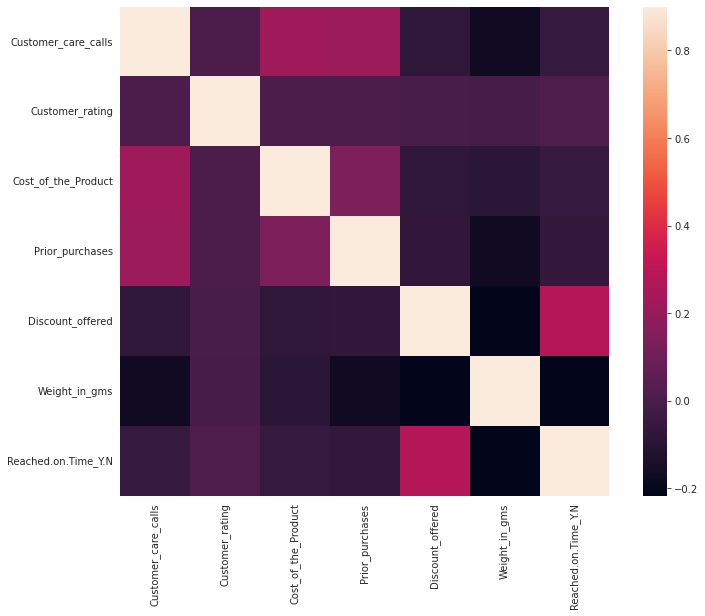

In [73]:

import matplotlib.pyplot as plt
corrmat = dataset.corr(method='kendall')
plt.subplots(figsize=(12,9))

sns.heatmap(corrmat, vmax=0.9, square=True)

### Видим, что: 
### есть корреляция скидки на товар и того, вовремя ли пришла посылка
### чуть меньше коррелируют цена продукта и обращения в поддержку, а также предыдущие покупки и стоимость продукта

## EDA

## теперь покажем, что корреляции действительно имеют место
## подготовим датафрейм для визуализации

In [74]:
cols = dataset.columns.drop(['Cost_of_the_Product', 
                             'Discount_offered', 
                             'Weight_in_gms', 
                             'Reached.on.Time_Y.N'])

cols2 = ['Cost_of_the_Product', 
         'Discount_offered', 
         'Weight_in_gms']


target_col = dataset.columns[-1]
target_col
dfs = []

for i in cols:

    df = pd.DataFrame(dataset.groupby(i)[target_col].mean())
    df['value_count'] = dataset.groupby(i)[target_col].count()
    df['value_count_%_of_total'] = (dataset.groupby(i)[target_col].count()/len(dataset))
    
    df.rename(columns={'Reached.on.Time_Y.N' : '%_of_shipments_delayed'}, inplace=True)

    df = (df.style
        .bar(subset=[df.columns[0]], color='#e87d8f')
        .bar(subset=['value_count'], color='#a4dba8')
        .bar(subset=['value_count_%_of_total'], color='#9ad7e3')
        .format(formatter={(df.columns[0]): '{:,.1%}',
                           ('value_count_%_of_total'): '{:,.1%}'
                              }))
    
    dfs.append(df)

for i in cols2:

    bins = pd.cut(dataset[i], 10)

    df = pd.DataFrame(dataset.groupby(bins)[target_col].mean())
    df['value_count'] = dataset.groupby(bins)[target_col].count()
    df['value_count_%_of_total'] = (dataset.groupby(bins)[target_col].count()/len(dataset))
    
    df.rename(columns={'Reached.on.Time_Y.N' : '%_of_shipments_delayed'}, inplace=True)
    
    df = (df.style
        .bar(subset=[df.columns[0]], color='#e87d8f')
        .bar(subset=['value_count'], color='#a4dba8')
        .bar(subset=['value_count_%_of_total'], color='#9ad7e3')
        .format(formatter={(df.columns[0]): '{:,.1%}',
                           ('value_count_%_of_total'): '{:,.1%}'
                              }))

    dfs.append(df)



## Видим, что большая часть доставок осуществлена кораблями

In [75]:
dfs[1]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Mode_of_Shipment,,,
Flight,60.2%,1777,16.2%
Road,58.8%,1760,16.0%
Ship,59.8%,7462,67.8%


## С ростом стоимости продукта процент задержки доставки снижается

In [76]:
dfs[7]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Cost_of_the_Product,,,
"(95.786, 117.4]",66.2%,222,2.0%
"(117.4, 138.8]",66.4%,532,4.8%
"(138.8, 160.2]",63.2%,1417,12.9%
"(160.2, 181.6]",63.0%,1331,12.1%
"(181.6, 203.0]",62.2%,1365,12.4%
"(203.0, 224.4]",58.9%,1306,11.9%
"(224.4, 245.8]",57.5%,1630,14.8%
"(245.8, 267.2]",56.1%,1927,17.5%
"(267.2, 288.6]",57.2%,953,8.7%


## При наличии скидки на товар растет вероятность задержки доставки, причем при скидке от 14 процентов доставки всегда задерживаются

In [77]:
dfs[8]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Discount_offered,,,
"(0.936, 7.4]",47.3%,5846,53.2%
"(7.4, 13.8]",49.2%,2668,24.3%
"(13.8, 20.2]",100.0%,334,3.0%
"(20.2, 26.6]",100.0%,266,2.4%
"(26.6, 33.0]",100.0%,310,2.8%
"(33.0, 39.4]",100.0%,295,2.7%
"(39.4, 45.8]",100.0%,281,2.6%
"(45.8, 52.2]",100.0%,373,3.4%
"(52.2, 58.6]",100.0%,289,2.6%


## Можно увидеть, что доставки с определенным весом имеют 100% шанс задержаться

In [78]:
dfs[9]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Weight_in_gms,,,
"(994.155, 1685.5]",67.6%,2226,20.2%
"(1685.5, 2370.0]",76.0%,1353,12.3%
"(2370.0, 3054.5]",100.0%,602,5.5%
"(3054.5, 3739.0]",100.0%,624,5.7%
"(3739.0, 4423.5]",53.7%,1537,14.0%
"(4423.5, 5108.0]",42.2%,2071,18.8%
"(5108.0, 5792.5]",43.0%,2001,18.2%
"(5792.5, 6477.0]",41.1%,579,5.3%
"(6477.0, 7161.5]",100.0%,1,0.0%


## Важные товары с большей вероятностью задерживаются

In [79]:
dfs[5]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Product_importance,,,
high,65.0%,948,8.6%
low,59.3%,5297,48.2%
medium,59.0%,4754,43.2%


# Применение алгоритмов ML


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

## Сделаем так, чтобы сначала отображались фиктивные переменные ( числовые переменные, используемые для представления категориальных данных)

In [81]:
dataset = pd.get_dummies(dataset)

In [82]:
dataset.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0


### Поместим столбец "reached on time" в конец

In [83]:

cols = list(dataset.columns.values)
cols.pop(cols.index('Reached.on.Time_Y.N'))
dataset = dataset[cols+['Reached.on.Time_Y.N']]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Разделим датасет на тестовую и тренировочную выборки

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Проведем стандартизацию входящих значений

In [85]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Создадим даатфрейм summary - в него будем помещать данные об эффективности алгоритмов для последующего сравнения

In [86]:

algo_summary = pd.DataFrame()


algos = ['Logistic Regression',
         'Decision Tree',
         'Random Forest',
         'XGBoost',
         'CatBoost']
conf_matrixes = pd.DataFrame(
    index=pd.MultiIndex.from_product([algos, ['1', '0']], 
                                     names=['Model:', 'Actual:']),
                                     columns=pd.Index(['1', '0'], 
                                     name='Predicted:')
)

In [87]:
print(conf_matrixes)

Predicted:                     1    0
Model:              Actual:          
Logistic Regression 1        NaN  NaN
                    0        NaN  NaN
Decision Tree       1        NaN  NaN
                    0        NaN  NaN
Random Forest       1        NaN  NaN
                    0        NaN  NaN
XGBoost             1        NaN  NaN
                    0        NaN  NaN
CatBoost            1        NaN  NaN
                    0        NaN  NaN


## Лог. Регрессия

# Тренируем лог.регрессию на тренировочном наборе

In [88]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Decision tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Создадим матрицы ошибок - таблицу с 4 различными комбинациями сочетаний прогнозируемых и фактических значений ( false negative, false positive, true positive, true negative)

In [90]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

conf_matrixes.loc['Decision Tree'] = cm

print(cm)
accuracy_score(y_test, y_pred)

[[522 386]
 [398 894]]


0.6436363636363637

## оценим модель при помощи кросс-валидации

In [91]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

algo_summary.loc['Decision Tree', 'accuracy'] = accuracies.mean()
algo_summary.loc['Decision Tree', 'stdev'] = accuracies.std()

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 64.78 %
Standard Deviation: 1.02 %


## Random Forest Classification

### Обучение модели Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Создадим матрицы ошибок

In [93]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

conf_matrixes.loc['Random Forest'] = cm

print(cm)
accuracy_score(y_test, y_pred)

[[650 258]
 [492 800]]


0.6590909090909091

### Оценим модель при помощи кросс-валидации

In [94]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

algo_summary.loc['Random Forest', 'accuracy'] = accuracies.mean()
algo_summary.loc['Random Forest', 'stdev'] = accuracies.std()

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 66.26 %
Standard Deviation: 1.11 %


## XGBoost

### Обучение

In [95]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Создадим матрицы ошибок

In [96]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

conf_matrixes.loc['XGBoost'] = cm

print(cm)
accuracy_score(y_test, y_pred)

[[574 334]
 [446 846]]


0.6454545454545455

### Оценим модель при помощи кросс-валидации

In [97]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

algo_summary.loc['XGBoost', 'accuracy'] = accuracies.mean()
algo_summary.loc['XGBoost', 'stdev'] = accuracies.std()

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 65.39 %
Standard Deviation: 1.39 %


## CatBoost

### Оценим модель при помощи кросс-валидации

In [98]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(silent=True)
classifier.fit(X_train, y_train)

### Создадим матрицы ошибок

In [99]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

conf_matrixes.loc['CatBoost'] = cm

print(cm)
accuracy_score(y_test, y_pred)

[[644 264]
 [506 786]]


0.65

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

algo_summary.loc['CatBoost', 'accuracy'] = accuracies.mean()
algo_summary.loc['CatBoost', 'stdev'] = accuracies.std()

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

## Результат алгоритмов

### Создадим map с результатами каждого алгоритма, чтобы сравнить их между собой

In [ ]:
cmap = sns.light_palette("blue", as_cmap=True)

(algo_summary.style
    .background_gradient(subset='accuracy', cmap=cmap)
    .format('{:,.1%}')
)